# Divorce rates and their relationship with Marriage rate and Median Age Marriage

In [1]:
# load data and copy
library(rethinking)
options(mc.cores = parallel::detectCores())
data(WaffleDivorce)
d <- WaffleDivorce
# standardize variables
d$A <- scale( d$MedianAgeMarriage )
d$D <- scale( d$Divorce )

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Loading required package: parallel

rethinking (Version 2.13)


Attaching package: 'rethinking'


The following object is masked from 'package:stats':

    rstudent




In [2]:
sd( d$MedianAgeMarriage )

[1] 1.24363

In [3]:
m5.1 <- quap(
alist(
D ~ dnorm( mu , sigma ) ,
mu <- a + bA * A ,
a ~ dnorm( 0 , 0.2 ) ,
bA ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data = d )

## Prior Predictive Simulation

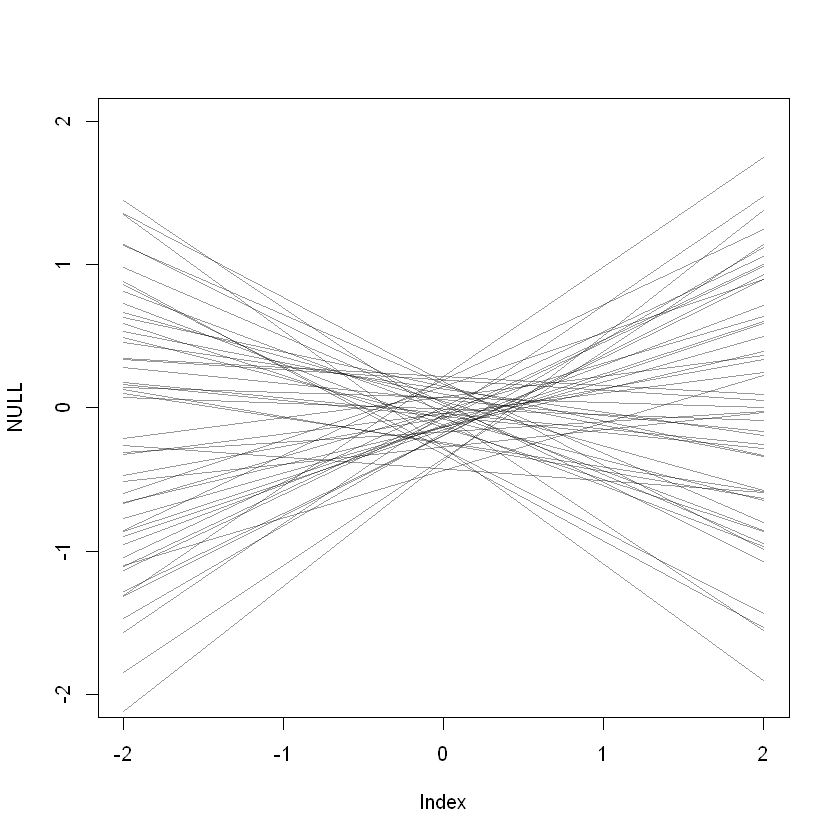

In [4]:
set.seed(10)
prior <- extract.prior( m5.1 )
mu <- link( m5.1 , post=prior , data=list( A=c(-2,2) ) )
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

## Divorce vs Median Age Marriage

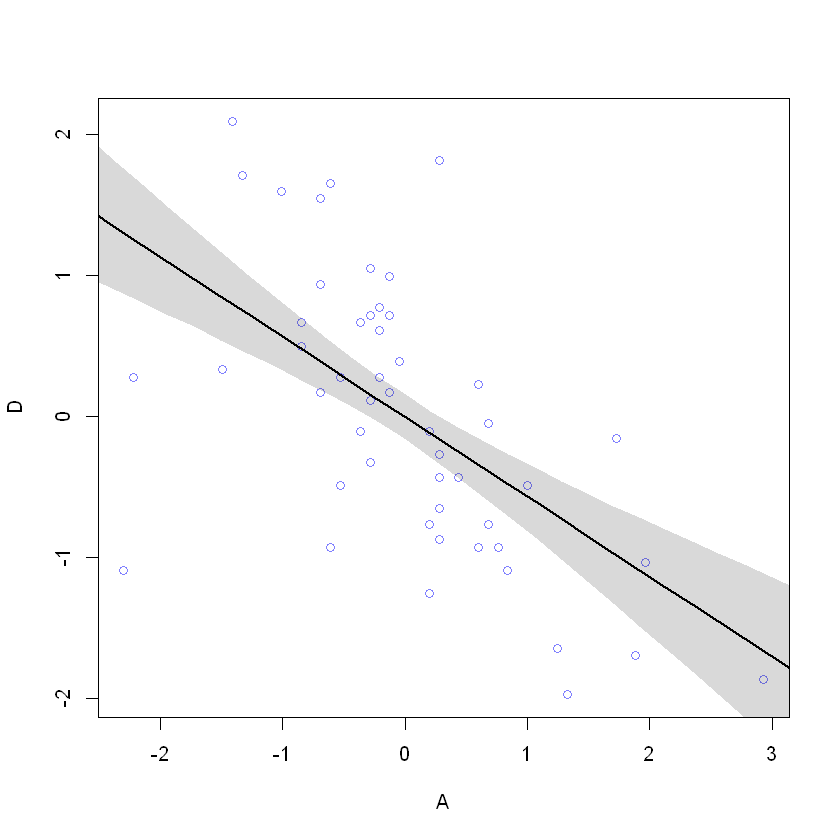

In [5]:
# compute percentile interval of mean
A_seq <- seq( from=-3 , to=3.2 , length.out=30 )
mu <- link( m5.1 , data=list(A=A_seq) )
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )
# plot it all
plot( D ~ A , data=d , col=rangi2 )
lines( A_seq , mu.mean , lwd=2 )
shade( mu.PI , A_seq )

In [6]:
d$M <- scale( d$Marriage )
m5.2 <- quap(
alist(
D ~ dnorm( mu , sigma ) ,
mu <- a + bM * M ,
a ~ dnorm( 0 , 0.2 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data = d )

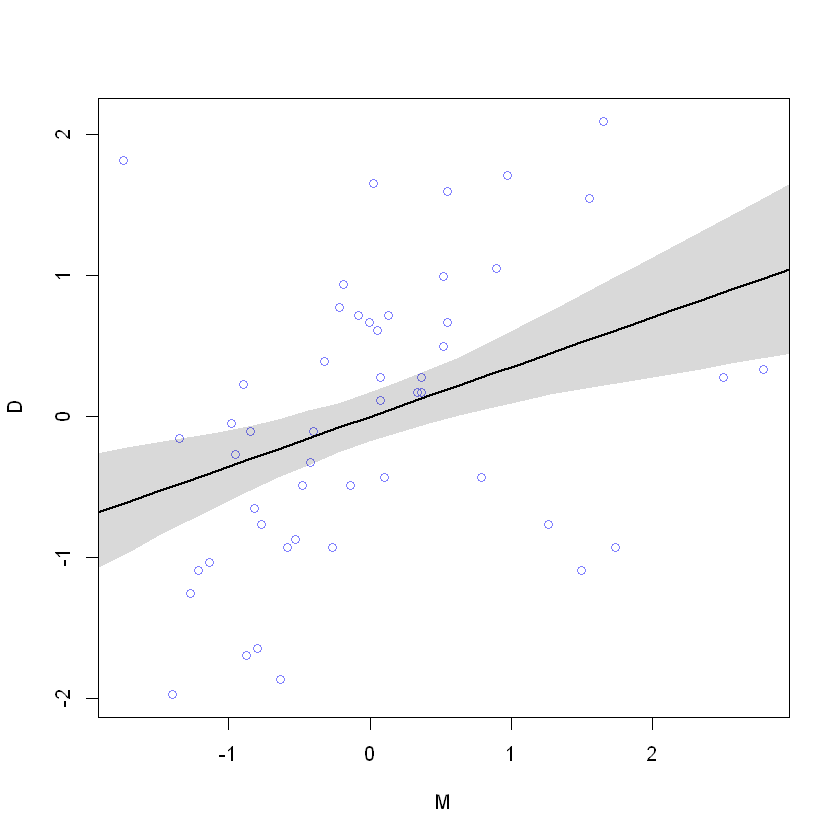

In [7]:
# compute percentile interval of mean
A_seq <- seq( from=-3 , to=3.2 , length.out=30 )
mu <- link( m5.2 , data=list(M=A_seq) )
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )
# plot it all
plot( D ~ M , data=d , col=rangi2 )
lines( A_seq , mu.mean , lwd=2 )
shade( mu.PI , A_seq )

# Directed Acyclic Graph

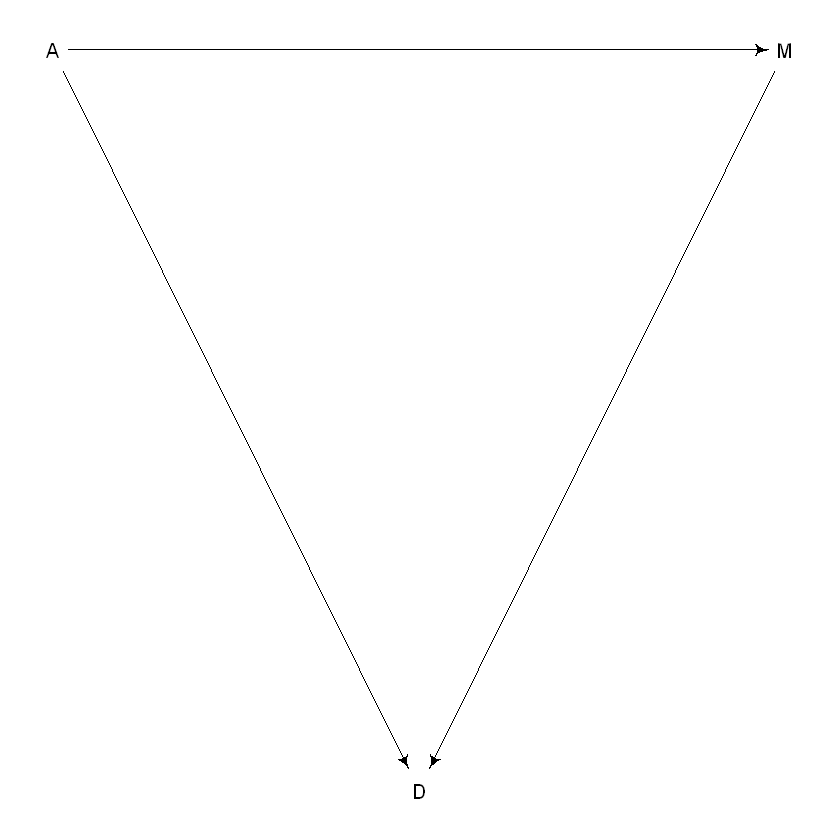

In [8]:
library(dagitty)
dag5.1 <- dagitty( "dag {
A -> D
A -> M
M -> D
}")
coordinates(dag5.1) <- list( x=c(A=0,D=1,M=2) , y=c(A=0,D=1,M=0) )
drawdag( dag5.1 )

## Another DAG with a different causal implication

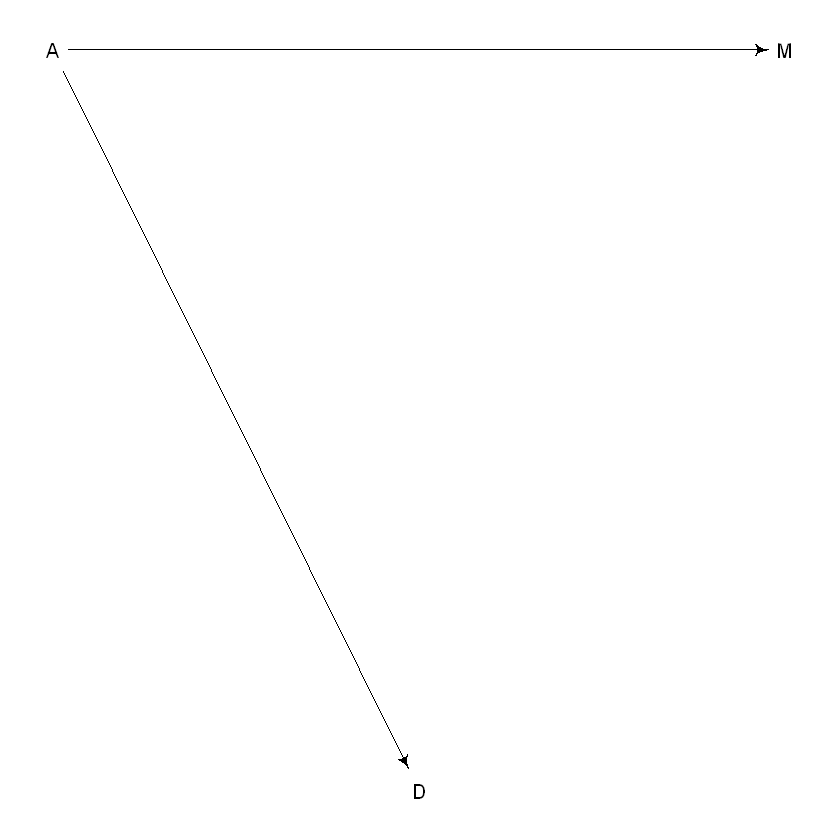

In [9]:
DMA_dag2 <- dagitty('dag{ D <- A -> M }')
coordinates(DMA_dag2) <- list( x=c(A=0,D=1,M=2) , y=c(A=0,D=1,M=0) )
drawdag(DMA_dag2)

In [10]:
impliedConditionalIndependencies( DMA_dag2 )

D _||_ M | A

### The above relation translates to D is independent of A conditional on A

## The following is a multiple regression :-

In [11]:
m5.3 <- quap(
alist(
D ~ dnorm( mu , sigma ) ,
mu <- a + bM*M + bA*A ,
a ~ dnorm( 0 , 0.2 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
bA ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data = d )
precis( m5.3 )


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,6.145791e-06,0.09707503,-0.1551385,0.1551508
bM,-6.539899e-02,0.15077111,-0.3063603,0.1755624
bA,-6.135264e-01,0.15098166,-0.8548242,-0.3722285
sigma,7.851074e-01,0.07784077,0.6607028,0.9095120


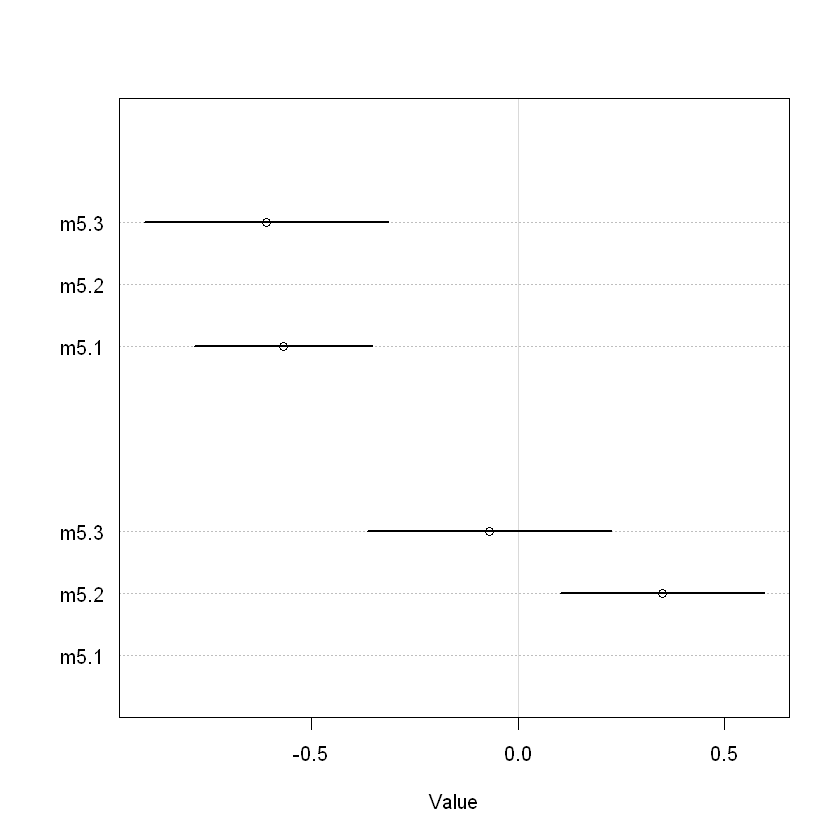

In [12]:
plot( coeftab(m5.1,m5.2,m5.3), par=c("bA","bM") )

In [15]:
# call link without specifying new data
# so it uses original data
mu <- link( m5.3 )


In [16]:
# summarize samples across cases
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

In [17]:
mu_mean

[1]  0.36835449  0.31784656  0.12017228  0.75459451 -0.35210242  0.11440238
 [7] -0.71202697 -0.32234556 -1.75748949 -0.11879864  0.03990749 -0.50119496
[13]  1.30713400 -0.43003870  0.17806805  0.29669317  0.48353821  0.58040213
[19]  0.06571790 -0.05857437 -0.58479839 -1.13328868 -0.11019518 -0.04025455
[25]  0.13737922  0.24800868  0.20043707  0.32938635 -0.31080577 -0.72174332
[31]  0.11845159 -1.10120331  0.16774389  0.25650940 -0.06778565  0.75004024
[37]  0.04567739 -0.43803436 -0.97164622 -0.13772628  0.22219827  0.43141234
[43]  0.39527777  1.19245533 -0.35493600 -0.17902292  0.05195235  0.48181752
[49] -0.07294773  0.72989698

In [18]:
mu_PI

5%,0.1562013,-0.01750389,-0.04314372,0.4147012,-0.5525603,-0.1328497,-0.9793711,-0.648136479,-2.433501,-0.3490095,...,0.0448409,0.1612790,0.1981170,0.7121631,-0.5910848,-0.365989353,-0.1278724,0.2605910,-0.3022358,0.188137
94%,0.5671654,0.64324070,0.28030955,1.0857921,-0.1537885,0.3458035,-0.4343818,-0.006013426,-1.127705,0.0894809,...,0.3966038,0.6773873,0.5886995,1.6518693,-0.1422689,-0.004714744,0.2183203,0.6917975,0.1341940,1.254396


In [19]:
D_sim <- sim( m5.3 , n=1e4 )


integer(0)

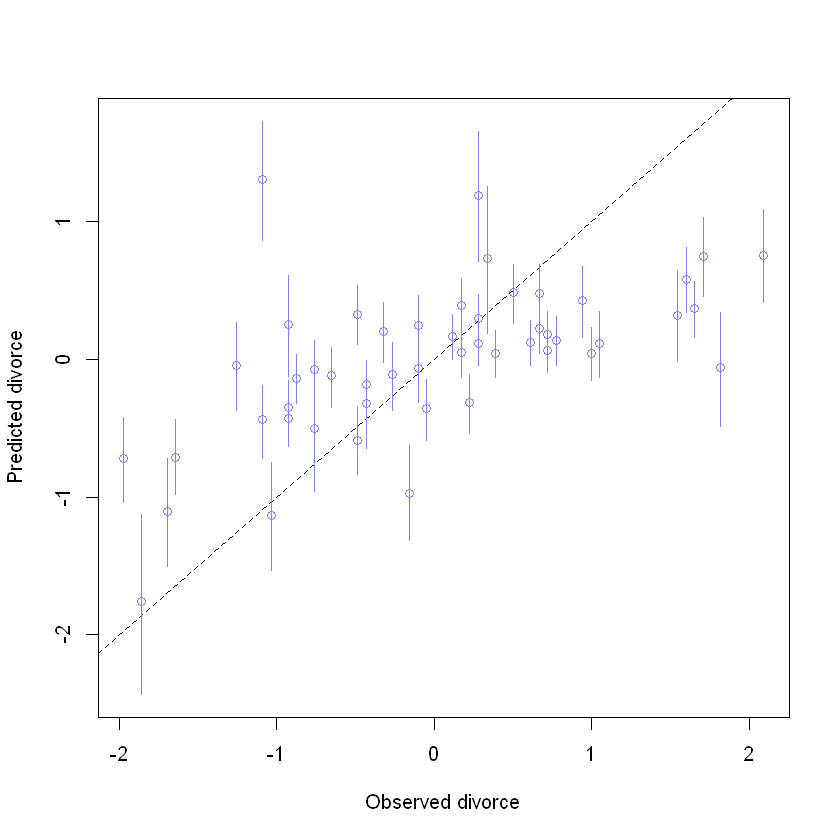

In [24]:
plot( mu_mean ~ d$D , col=rangi2 , ylim=range(mu_PI) ,
xlab="Observed divorce" , ylab="Predicted divorce" )
abline( a=0 , b=1 , lty=2 )
for ( i in 1:nrow(d) ) lines( rep(d$D[i],2) , mu_PI[,i] , col=rangi2 )
identify( x=d$D , y=mu_mean , labels=d$Loc )

In [25]:
N <- 100 # number of cases
x_real <- rnorm( N ) # x_real as Gaussian with mean 0 and stddev 1
x_spur <- rnorm( N , x_real ) # x_spur as Gaussian with mean=x_real
y <- rnorm( N , x_real ) # y as Gaussian with mean=x_real
d <- data.frame(y,x_real,x_spur) # bind all together in data frame

In [26]:
x_spur

[1] -1.352055562  0.692630018  2.389704885 -0.277785286  2.208781964
  [6] -0.623157211 -0.691301778 -0.008416575 -2.106896662 -2.475596402
 [11]  3.777529247  0.086976581 -2.632224911 -2.720390804 -0.663492281
 [16]  1.920607955  0.335483979 -0.282782625  1.013936623  2.974427005
 [21]  0.901401247 -2.055111792  0.765853777 -1.497968458  0.081378439
 [26] -1.316753504  0.702541619  0.574591348  2.898430996 -1.551203879
 [31]  0.624935823  0.588252048  1.324750393 -1.132932527  0.157429074
 [36]  0.018648688 -0.417081802 -1.724516597  1.939989905  0.243119623
 [41] -0.343638634  2.393542375  0.550024313 -1.180044890 -0.871716809
 [46]  0.859613672  0.033162778  2.408668594  1.237655690 -1.313127551
 [51]  0.040534881  0.433098260  0.575605325  0.051594380 -1.393899540
 [56] -0.239471666 -1.093595064  1.123130777  1.196033020  3.182378608
 [61]  3.017566585 -0.101827794  0.009738371 -0.896915104  0.799666659
 [66] -0.966017874  0.724005991  2.341779631 -0.168071738 -2.021780059
 [71] -1.932213968  3.325088022 -0.728398228  0.267828900 -0.656170322
 [76] -0.045508582 -0.719921621 -1.167733187  1.771041027 -0.490194900
 [81] -0.219563778 -0.118072363 -0.503507180  1.271671198 -0.570450683
 [86]  2.082560238 -1.665583059  1.678010083  0.285611915 -1.384613750
 [91]  1.188483956  1.038077321  1.289978916  0.727116348  1.001155975
 [96]  4.826558556 -0.412610227 -1.962556627  1.589773104  0.869737378

In [27]:
x_real

[1]  0.465048716  0.104996327  0.591889277  0.456121019  1.138023921
  [6] -1.217210427  0.600311222 -1.101364830 -0.883278574 -0.969457867
 [11]  2.211207267  0.781330749 -1.162809073  0.016481338 -0.772072564
 [16]  1.312616166 -1.300977061  1.896854510  1.550099188  1.519393751
 [21] -0.331432676 -1.661107784  0.712376194 -2.089620974 -0.052980536
 [26] -1.638248583 -0.352844033  0.690809926  1.352058748 -0.569337960
 [31]  2.075661478  0.040186656  0.052168982 -0.957344116  0.000424660
 [36] -0.574711313 -0.391885586  0.286070510  1.251981554 -0.429467160
 [41] -0.757008186  0.671992176  0.607393564 -0.077122589  0.150965324
 [46] -0.452397772 -0.063473651 -0.513526218  0.871929643 -0.963613924
 [51]  0.354298984 -0.184439847 -0.143818258  1.389814283 -0.314723908
 [56] -1.363369303  0.558470264 -0.970500150 -0.007446092  0.626770296
 [61]  2.338899390 -0.176170200 -0.753746569  0.067483992 -0.119438612
 [66] -0.742946582  0.306037346  1.455471274  0.450456431 -0.414867967
 [71] -1.270971001  1.498668526  0.351263270 -0.014193040 -0.622948361
 [76]  0.687860010 -0.618357567 -1.451813575  1.596633296  0.296462825
 [81] -0.407069732  0.617317396 -0.440971689  0.309480565 -0.404878084
 [86] -0.371848685 -1.325552130  1.523289073  0.355501080  0.568934108
 [91]  0.680067388  0.219846402  1.348394673  0.054660498  0.879076084
 [96]  3.436489345 -0.726564047 -0.660313922  0.244668789  0.333072384

In [28]:
d

y,x_real,x_spur
<dbl>,<dbl>,<dbl>
1.23837003,0.46504872,-1.352055562
0.21014531,0.10499633,0.692630018
0.75867059,0.59188928,2.389704885
1.20829338,0.45612102,-0.277785286
2.85487807,1.13802392,2.208781964
-2.23129968,-1.21721043,-0.623157211
0.38395229,0.60031122,-0.691301778
-1.37574356,-1.10136483,-0.008416575
-0.92992473,-0.88327857,-2.106896662


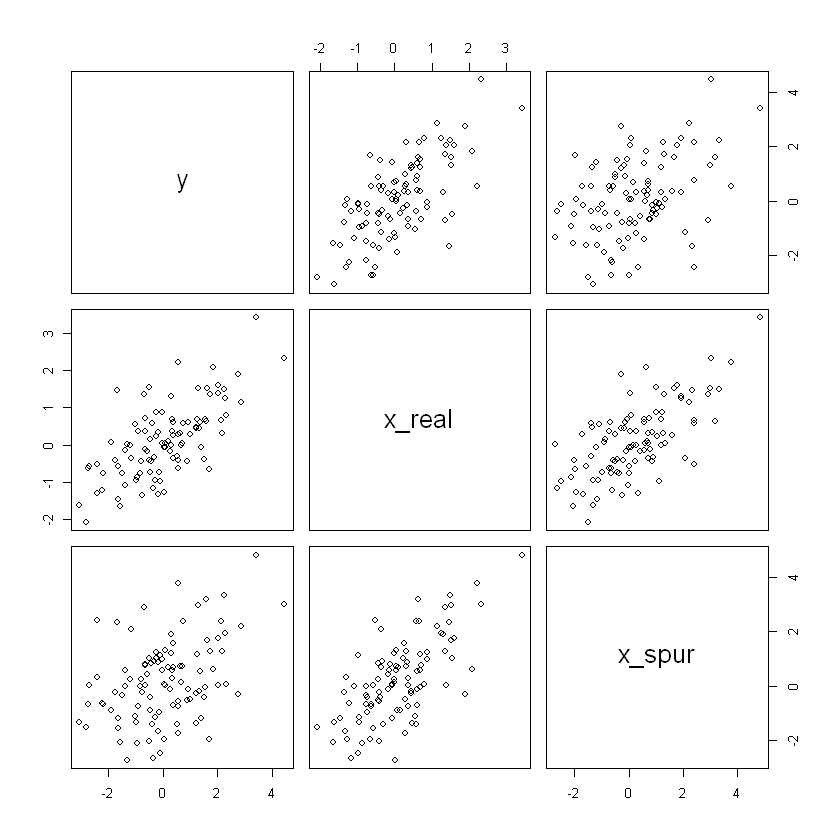

In [29]:
pairs(d)

# Counterfactual Plots

## Considering the below DAG we try to simulate the effect of A on D while also including the effect A has on M 

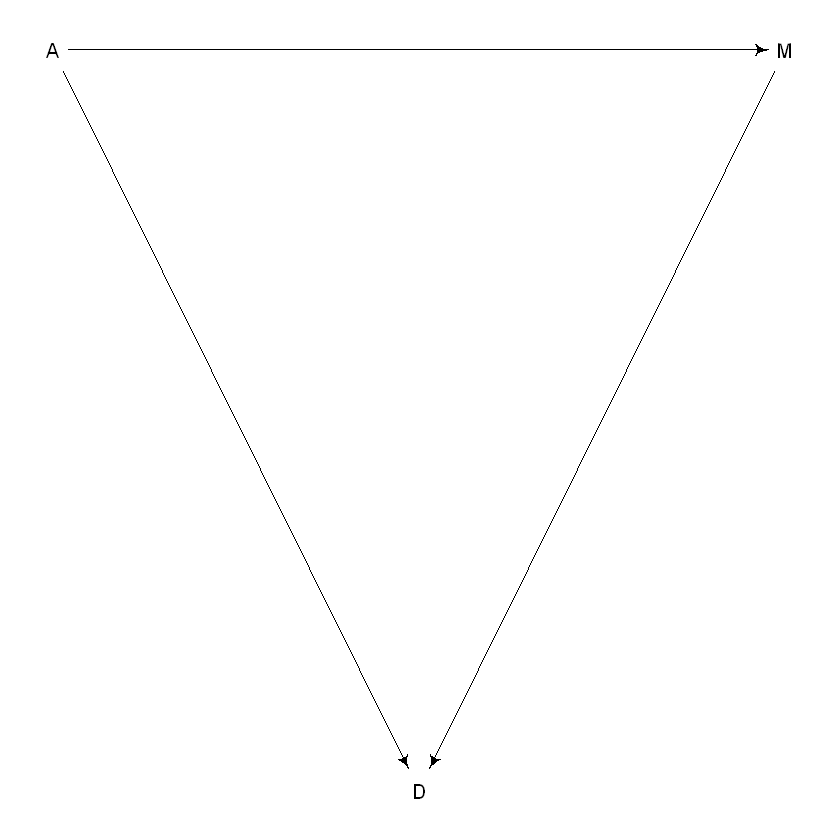

In [36]:
drawdag( dag5.1 )

In [40]:
data(WaffleDivorce)
d <- list()
d$A <- standardize( WaffleDivorce$MedianAgeMarriage )
d$D <- standardize( WaffleDivorce$Divorce )
d$M <- standardize( WaffleDivorce$Marriage )
m5.3_A <- quap(
alist(
## A -> D <- M
D ~ dnorm( mu , sigma ) ,
mu <- a + bM*M + bA*A ,
a ~ dnorm( 0 , 0.2 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
bA ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 ),
## A -> M
M ~ dnorm( mu_M , sigma_M ),
mu_M <- aM + bAM*A,
aM ~ dnorm( 0 , 0.2 ),
bAM ~ dnorm( 0 , 0.5 ),
sigma_M ~ dexp( 1 )
) , data = d )

In [41]:
A_seq <- seq( from=-2 , to=2 , length.out=30 )

In [42]:
# prep data
sim_dat <- data.frame( A=A_seq )

## Given the data(A_seq) we simulate M first and later use this A_seq,M to generate D

In [33]:
# simulate M and then D, using A_seq
s <- sim( m5.3_A , data=sim_dat , vars=c("M","D") )

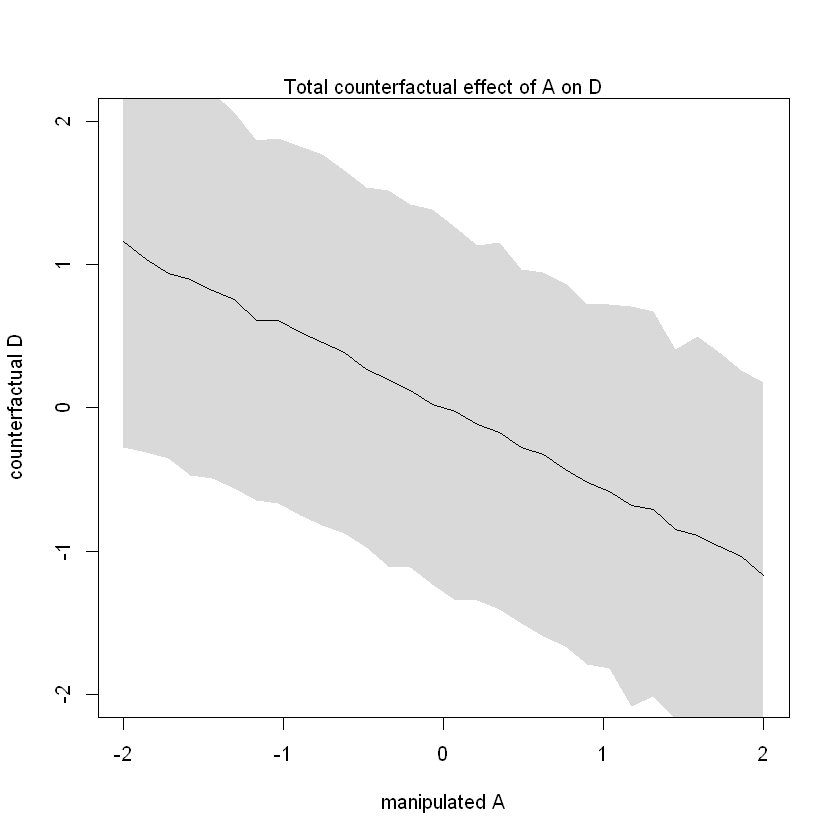

In [34]:
# display counterfactual predictions
plot( sim_dat$A , colMeans(s$D) , ylim=c(-2,2) , type="l" ,
xlab="manipulated A" , ylab="counterfactual D" )
shade( apply(s$D,2,PI) , sim_dat$A )
mtext( "Total counterfactual effect of A on D" )

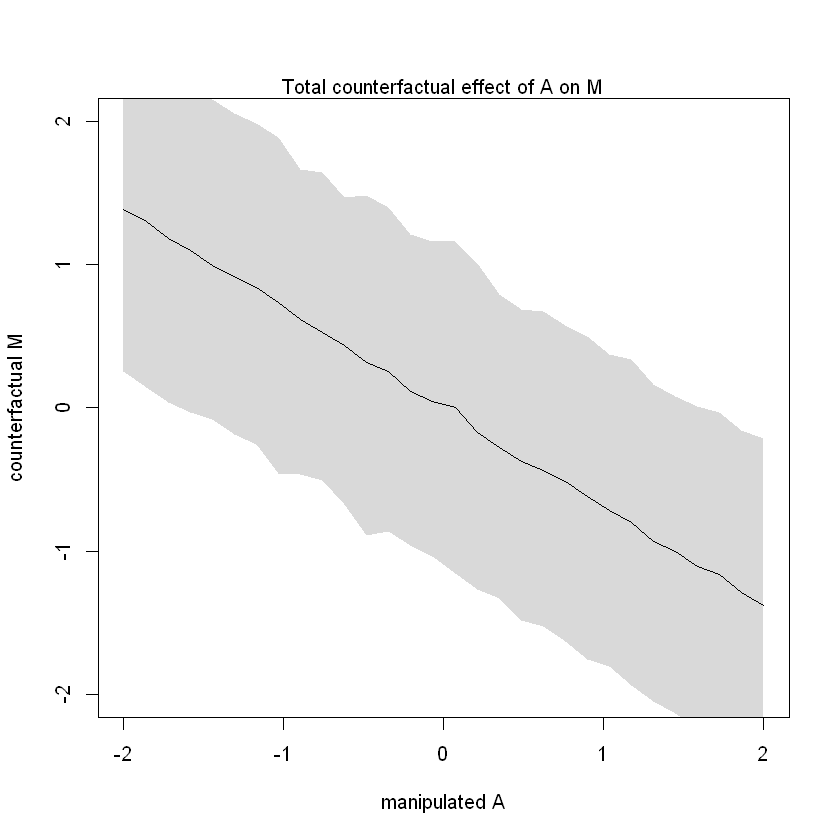

In [35]:
plot( sim_dat$A , colMeans(s$M) , ylim=c(-2,2) , type="l" ,
xlab="manipulated A" , ylab="counterfactual M" )
shade( apply(s$M,2,PI) , sim_dat$A )
mtext( "Total counterfactual effect of A on M" )

## The above counterfactual plots show that A has a direct influence on both A and M as assumed by our model

## What happends when we try to manipulate A without involving the causal change in M ?
1. Implies that we use A -> D and M -> D 
2. The code uses simulating **only D** assuming A = 0 (average State in US )

In [43]:
# simulate D, using A_seq
sim_dat <- data.frame( M=seq(from=-2,to=2,length.out=30) , A=0 )
s <- sim( m5.3_A , data=sim_dat , vars="D")

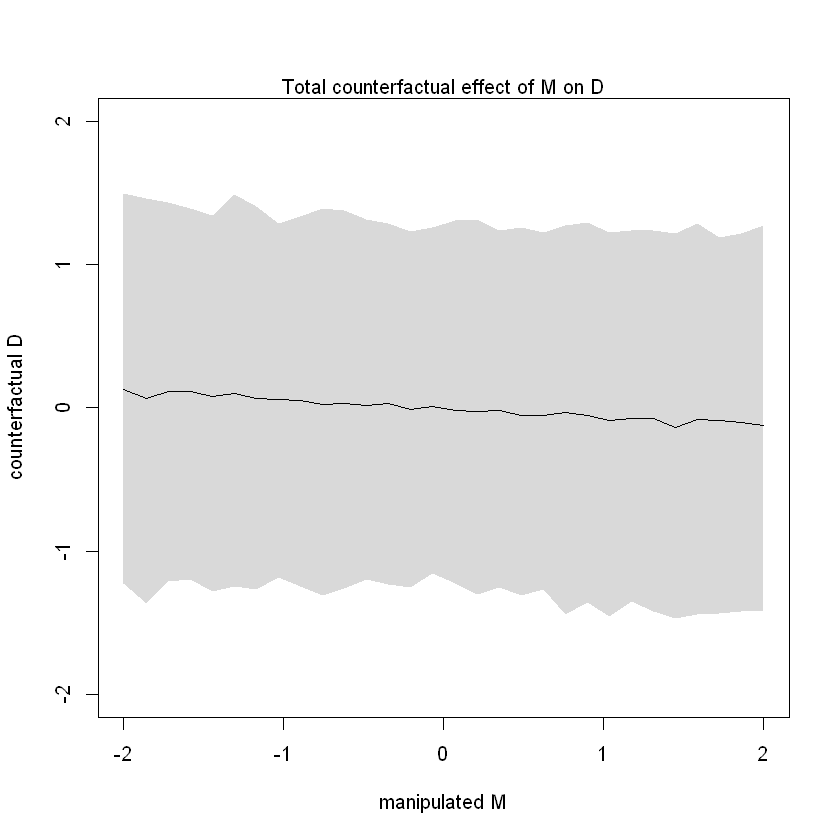

In [44]:
plot( sim_dat$M , colMeans(s) , ylim=c(-2,2) , type="l" ,
xlab="manipulated M" , ylab="counterfactual D" )
shade( apply(s,2,PI) , sim_dat$M )
mtext( "Total counterfactual effect of M on D" )

### The above plot shows that M doesnt have a significant affect on D

# Spurious Waffles 

In [1]:
library(rethinking)
data(milk)
d <- milk
str(d)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Loading required package: parallel

rethinking (Version 2.13)


Attaching package: 'rethinking'


The following object is masked from 'package:stats':

    rstudent




'data.frame':	29 obs. of  8 variables:
 $ clade         : Factor w/ 4 levels "Ape","New World Monkey",..: 4 4 4 4 4 2 2 2 2 2 ...
 $ species       : Factor w/ 29 levels "A palliata","Alouatta seniculus",..: 11 8 9 10 16 2 1 6 28 27 ...
 $ kcal.per.g    : num  0.49 0.51 0.46 0.48 0.6 0.47 0.56 0.89 0.91 0.92 ...
 $ perc.fat      : num  16.6 19.3 14.1 14.9 27.3 ...
 $ perc.protein  : num  15.4 16.9 16.9 13.2 19.5 ...
 $ perc.lactose  : num  68 63.8 69 71.9 53.2 ...
 $ mass          : num  1.95 2.09 2.51 1.62 2.19 5.25 5.37 2.51 0.71 0.68 ...
 $ neocortex.perc: num  55.2 NA NA NA NA ...


In [2]:
d$K <- scale( d$kcal.per.g )
d$N <- scale( d$neocortex.perc )
d$M <- scale( log(d$mass) )

In [3]:
m5.5_draft <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bN*N ,
a ~ dnorm( 0 , 1 ) ,
bN ~ dnorm( 0 , 1 ) ,
sigma ~ dexp( 1 )
) , data=d )

ERROR: Error in quap(alist(K ~ dnorm(mu, sigma), mu <- a + bN * N, a ~ dnorm(0, : initial value in 'vmmin' is not finite
The start values for the parameters were invalid. This could be caused by missing values (NA) in the data or by start values outside the parameter constraints. If there are no NA values in the data, try using explicit start values.


In [4]:
d$neocortex.perc

[1] 55.16    NA    NA    NA    NA 64.54 64.54 67.64    NA 68.85 58.85 61.69
[13] 60.32    NA    NA 69.97    NA 70.41    NA 73.40    NA 67.53    NA 71.26
[25] 72.60    NA 70.24 76.30 75.49

In [5]:
dcc <- d[ complete.cases(d$K,d$N,d$M) , ]


In [6]:
m5.5_draft <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bN*N ,
a ~ dnorm( 0 , 1 ) ,
bN ~ dnorm( 0 , 1 ) ,
sigma ~ dexp( 1 )
) , data=dcc )


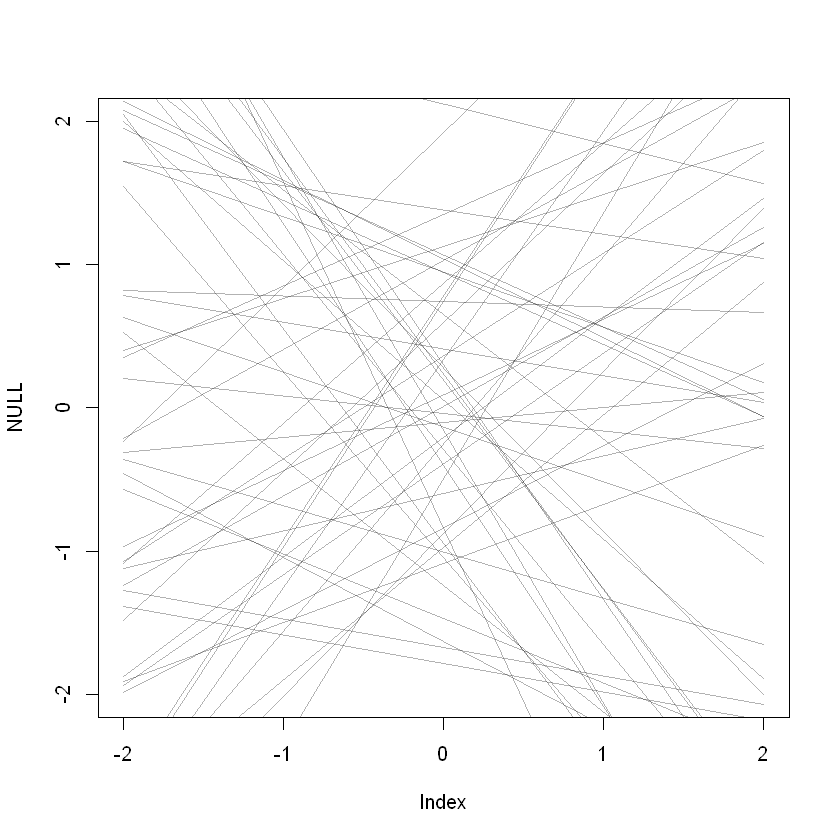

In [7]:
prior <- extract.prior( m5.5_draft )
xseq <- c(-2,2)
mu <- link( m5.5_draft , post=prior , data=list(N=xseq) )
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

## Impossible priors 

## Tightening the priors so that we have reasonable values

In [8]:
m5.5 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bN*N ,
a ~ dnorm( 0 , 0.2 ) ,
bN ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data=dcc )

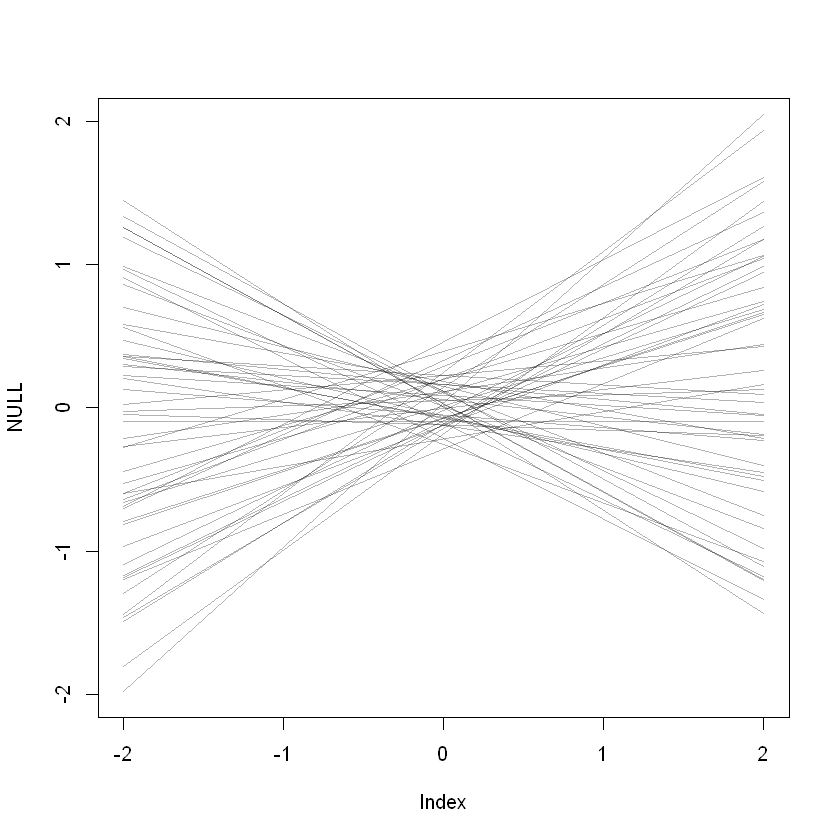

In [9]:
prior <- extract.prior( m5.5 )
xseq <- c(-2,2)
mu <- link( m5.5_draft , post=prior , data=list(N=xseq) )
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

In [10]:
precis( m5.5 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.03993997,0.1544908,-0.2069662,0.2868461
bN,0.13323493,0.2237469,-0.2243559,0.4908258
sigma,0.99982070,0.1647082,0.7365852,1.2630562


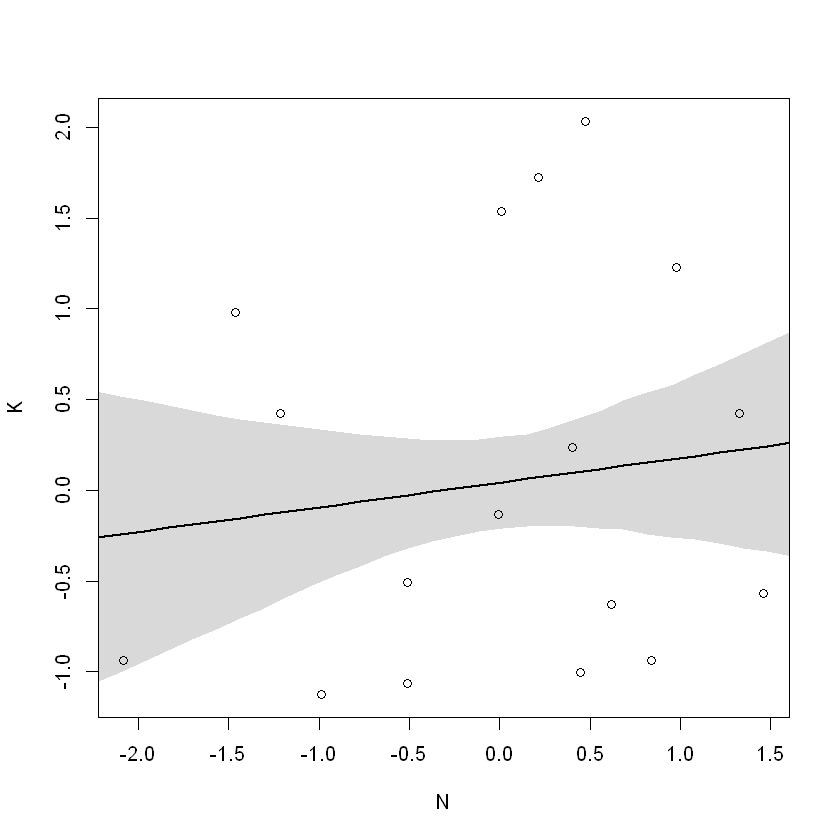

In [11]:
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.5 , data=list(N=xseq) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ N , data=dcc )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

In [12]:
m5.6 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bM*M ,
a ~ dnorm( 0 , 0.2 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data=dcc )
precis(m5.6)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.04639191,0.1512784,-0.1953801,0.28816396
bM,-0.28249661,0.1928751,-0.5907483,0.02575509
sigma,0.94923665,0.1570432,0.6982513,1.20022199


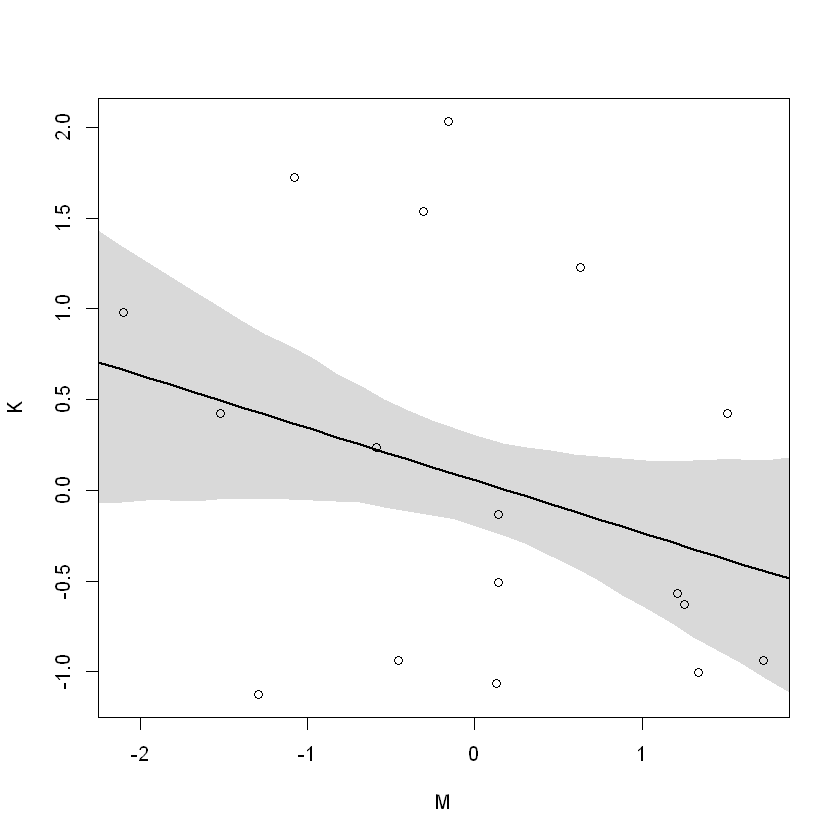

In [14]:
xseq <- seq( from=min(dcc$M)-0.15 , to=max(dcc$M)+0.15 , length.out=30 )
mu <- link( m5.6 , data=list(M=xseq) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ M , data=dcc )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

In [15]:
m5.7 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bN*N + bM*M ,
a ~ dnorm( 0 , 0.2 ) ,
bN ~ dnorm( 0 , 0.5 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data=dcc )
precis(m5.7)


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.06799076,0.1340005,-0.1461680,0.2821495
bN,0.67510201,0.2483044,0.2782636,1.0719405
bM,-0.70298796,0.2207911,-1.0558547,-0.3501212
sigma,0.73803237,0.1324698,0.5263200,0.9497447


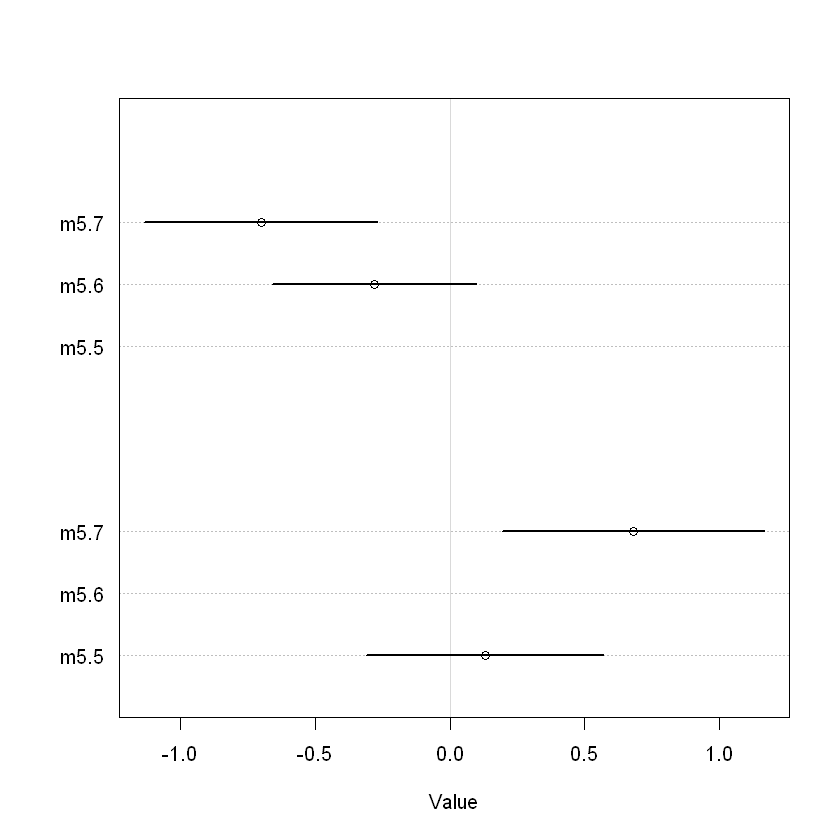

In [16]:
plot( coeftab( m5.5 , m5.6 , m5.7 ) , pars=c("bM","bN") )

## Using both M and N have increased their influence on the outcome in a more farther direction

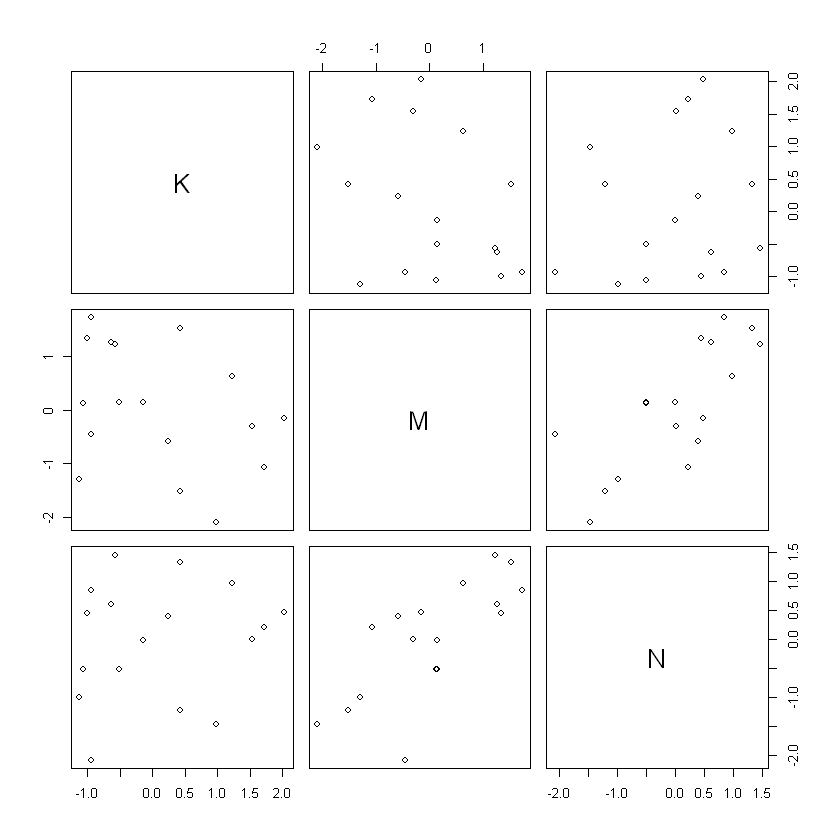

In [17]:
 pairs( ~K + M + N ,
dcc )

## Counterfactual with N = 0

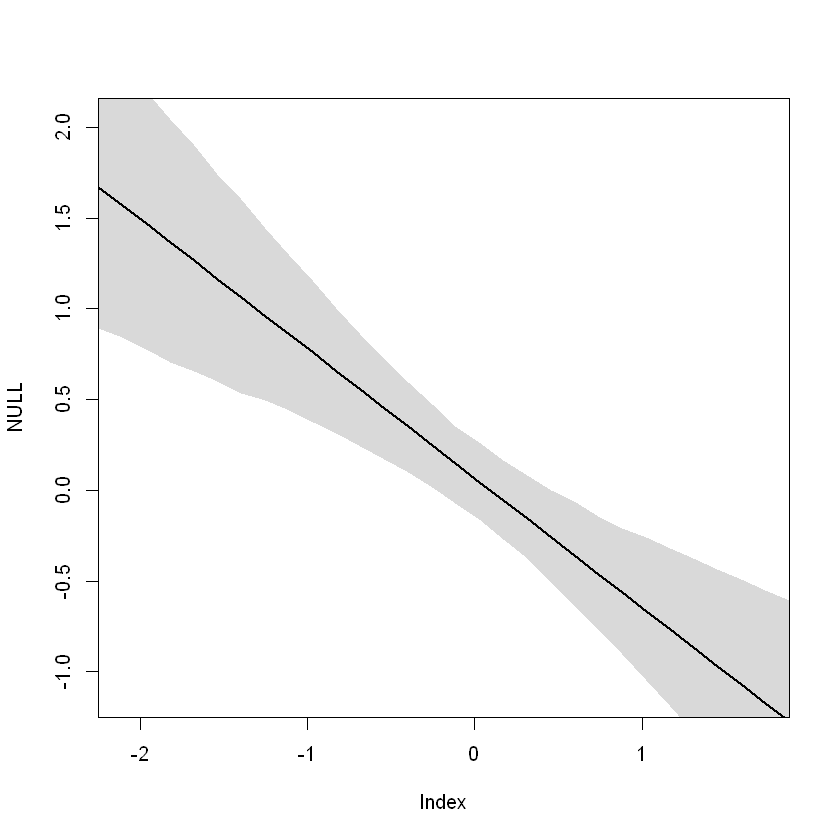

In [18]:
xseq <- seq( from=min(dcc$M)-0.15 , to=max(dcc$M)+0.15 , length.out=30 )
mu <- link( m5.7 , data=data.frame( M=xseq , N=0 ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(dcc$M) , ylim=range(dcc$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

## Counterfactual with M = 0

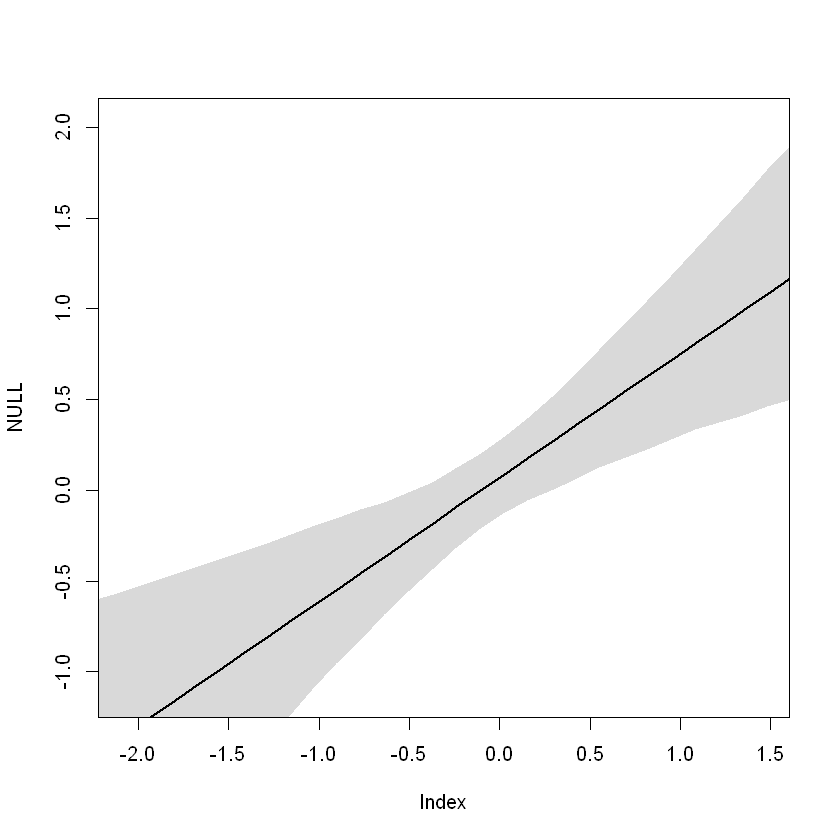

In [19]:
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.7 , data=data.frame( N=xseq , M=0 ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(dcc$N) , ylim=range(dcc$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

## So it is clear that M and N when applied together lead to stronger effect 

# Index Variables

### Using dummy variables for categorical data doesnot help with the prior so we try to use Index variables

In [21]:
data(Howell1)
d <- Howell1
str(d)

'data.frame':	544 obs. of  4 variables:
 $ height: num  152 140 137 157 145 ...
 $ weight: num  47.8 36.5 31.9 53 41.3 ...
 $ age   : num  63 63 65 41 51 35 32 27 19 54 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


In [22]:
mu_female <- rnorm(1e4,178,20)
mu_male <- rnorm(1e4,178,20) + rnorm(1e4,0,10)
precis( data.frame( mu_female , mu_male ) )

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
mu_female,177.6473,19.95584,145.6448,209.5282,<U+2581><U+2581><U+2583><U+2587><U+2587><U+2582><U+2581><U+2581>
mu_male,178.2149,22.19615,142.7647,213.3100,<U+2581><U+2581><U+2581><U+2583><U+2587><U+2587><U+2583><U+2581><U+2581><U+2581>


### Prior predictive simulation clearly shows that male has more deviation in its values even though there is no prior reasoning to that

\begin{align}
h_i = Normal(\mu_i,\sigma)\\
\mu_i = \alpha_i + \beta_m*m_i 
\end{align}

since $\alpha_i$  represents the avg female height when $m_i$ = 0 and if it is 1 there are 2 parameters that determine male height causing more uncertainity even when there is no prior evidence

In [23]:
d$sex <- ifelse( d$male==1 , 2 , 1 )
str( d$sex )

 num [1:544] 2 1 1 2 1 2 1 2 1 2 ...


In [27]:
m5.8 <- quap(
alist(
height ~ dnorm( mu , sigma ) ,
mu <- a[sex] ,
a[sex] ~ dnorm( 178 , 20 ) ,
sigma ~ dunif( 0 , 50 )
) , data=d )

precis( m5.8 , depth=2 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],134.91059,1.6069414,132.3424,137.47879
a[2],142.57873,1.6974815,139.8658,145.29164
sigma,27.31009,0.8280521,25.9867,28.63348


In [28]:
post <- extract.samples(m5.8)
post$diff_fm <- post$a[,1] - post$a[,2]
precis( post , depth=2 )


,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sigma,27.321169,0.819567,26.01392,28.619513,<U+2581><U+2581><U+2581><U+2581><U+2583><U+2587><U+2587><U+2587><U+2583><U+2582><U+2581><U+2581><U+2581><U+2581>
a[1],134.913639,1.619593,132.27227,137.503628,<U+2581><U+2581><U+2581><U+2581><U+2582><U+2585><U+2587><U+2587><U+2585><U+2582><U+2581><U+2581><U+2581>
a[2],142.546916,1.706710,139.82388,145.276203,<U+2581><U+2581><U+2581><U+2582><U+2583><U+2587><U+2587><U+2587><U+2583><U+2582><U+2581><U+2581><U+2581><U+2581>
diff_fm,-7.633278,2.349692,-11.40781,-3.917746,<U+2581><U+2581><U+2581><U+2582><U+2587><U+2587><U+2583><U+2581><U+2581><U+2581>


### So this variable  diff_fm  is called the Contrast

In [29]:
data(milk)
d <- milk
unique(d$clade)

[1] Strepsirrhine    New World Monkey Old World Monkey Ape             
Levels: Ape New World Monkey Old World Monkey Strepsirrhine

In [31]:
d$clade_id <- as.integer( d$clade )
d$clade_id

[1] 4 4 4 4 4 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1

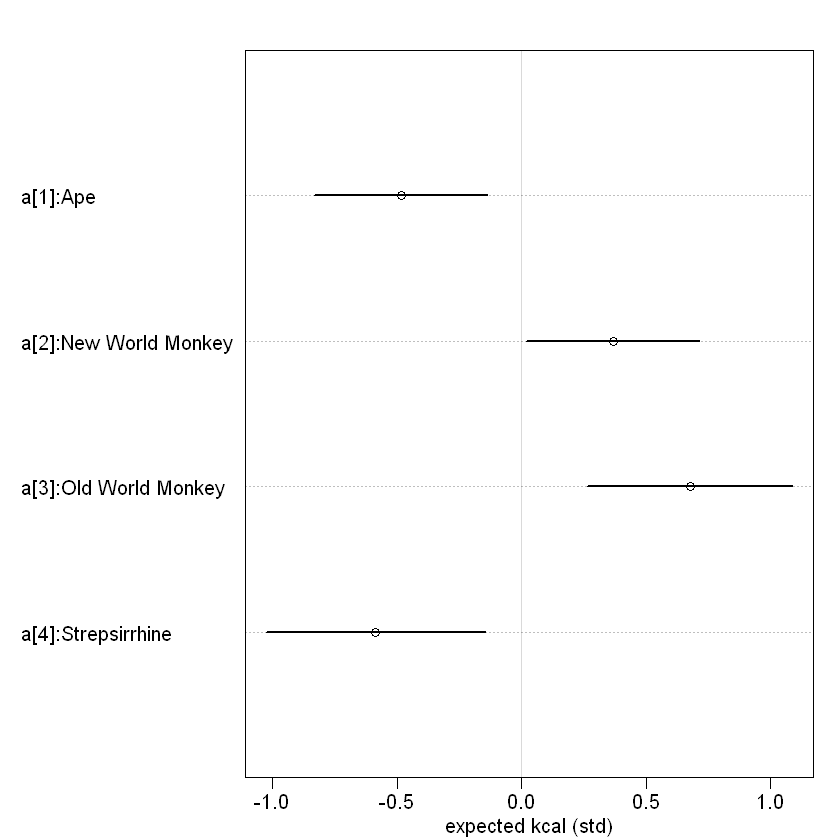

In [32]:
d$K <- scale( d$kcal.per.g )
m5.9 <- quap(
alist(
K ~ dnorm( mu , sigma ),
mu <- a[clade_id],
a[clade_id] ~ dnorm( 0 , 0.5 ),
sigma ~ dexp( 1 )
) , data=d )
labels <- paste( "a[" , 1:4 , "]:" , levels(d$clade) , sep="" )
plot( precis( m5.9 , depth=2 , pars="a" ) , labels=labels ,
xlab="expected kcal (std)" )


### The above example shows how this idea of Index Variables scales up 
And when you want to find the difference u need to simulate from the posterior distribution